In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score

## Data Overview

In [2]:
# Mengimport data train
df_train = pd.read_csv(r"https://raw.githubusercontent.com/mujirahmuji/Customer-s-Churn-Prediction/main/Data%20Train.csv")
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


Data diatas memiliki total 20 kolom yang setiap kolom tidak memiliki data missing value yang dilihat dari jumlah (count) record masing-masing kolom semuanya sama dengan 4250 data. Terlihat bahwa 5 kolom bertipe object/teks, 7 kolom tipe data integer dan sisanya kolom dengan tipe data float

In [4]:
# Mengimport data test
df_test = pd.read_csv(r"https://raw.githubusercontent.com/mujirahmuji/Customer-s-Churn-Prediction/main/Data%20Test.csv")
df_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


## EXPLORATORY DATA ANALYSIS

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [6]:
# menghitung nilai duplicated pada data (jika ada)
print('Nilai duplicated data :', df_train.duplicated().sum())

Nilai duplicated data : 0


In [7]:
# menghitung nilai duplicated pada data (jika ada)
print('Nilai duplicated data :', df_test.duplicated().sum())

Nilai duplicated data : 0


In [8]:
# menghitung nilai unique pada data (jika ada)
print('Nilai unique setiap kolom :\n', df_train.nunique())

Nilai unique setiap kolom :
 state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
dtype: int64


In [9]:
# menghitung nilai duplicated pada data (jika ada)
print('Nilai unique setiap kolom :\n', df_test.nunique())

Nilai unique setiap kolom :
 id                               750
state                             51
account_length                   175
area_code                          3
international_plan                 2
voice_mail_plan                    2
number_vmail_messages             39
total_day_minutes                619
total_day_calls                  100
total_day_charge                 619
total_eve_minutes                611
total_eve_calls                  102
total_eve_charge                 584
total_night_minutes              628
total_night_calls                 97
total_night_charge               502
total_intl_minutes               135
total_intl_calls                  17
total_intl_charge                135
number_customer_service_calls      7
dtype: int64


In [11]:
# menghitung nilai null pada data (jika ada)
print('Nilai null data:\n', df_train.isna().sum())

Nilai null data:
 state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


In [12]:
# menghitung nilai null pada data (jika ada)
print('Nilai null data:\n', df_test.isna().sum())

Nilai null data:
 id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64


data frame train di atas tidak memiliki data duplikat atau ganda

In [9]:
# Statistik deskriptif data
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [41]:
# Statistik deskriptif data
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,750.0,375.500000,216.650640,1.00,188.2500,375.500,562.7500,750.00
account_length,750.0,100.385333,39.699029,1.00,74.0000,101.000,126.0000,238.00
number_vmail_messages,750.0,8.454667,14.123712,0.00,0.0000,0.000,21.0000,51.00
total_day_minutes,750.0,180.454933,53.258337,12.50,146.6250,178.200,215.9750,350.80
total_day_calls,750.0,100.721333,19.718539,39.00,88.0000,101.000,114.0000,163.00
total_day_charge,750.0,30.677920,9.053756,2.13,24.9250,30.295,36.7150,59.64
total_eve_minutes,750.0,203.258267,52.185471,31.20,166.8000,203.350,235.9750,363.70
total_eve_calls,750.0,100.273333,19.367535,37.00,87.0000,101.000,113.0000,164.00
total_eve_charge,750.0,17.277080,4.435638,2.65,14.1775,17.285,20.0575,30.91
total_night_minutes,750.0,199.619467,51.531351,50.90,164.4750,199.450,234.8000,364.30


In [5]:
numeric_col = [x for x in df_train.columns if df_train[x].dtype=='int64' or df_train[x].dtype=='float64']
numeric_col

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

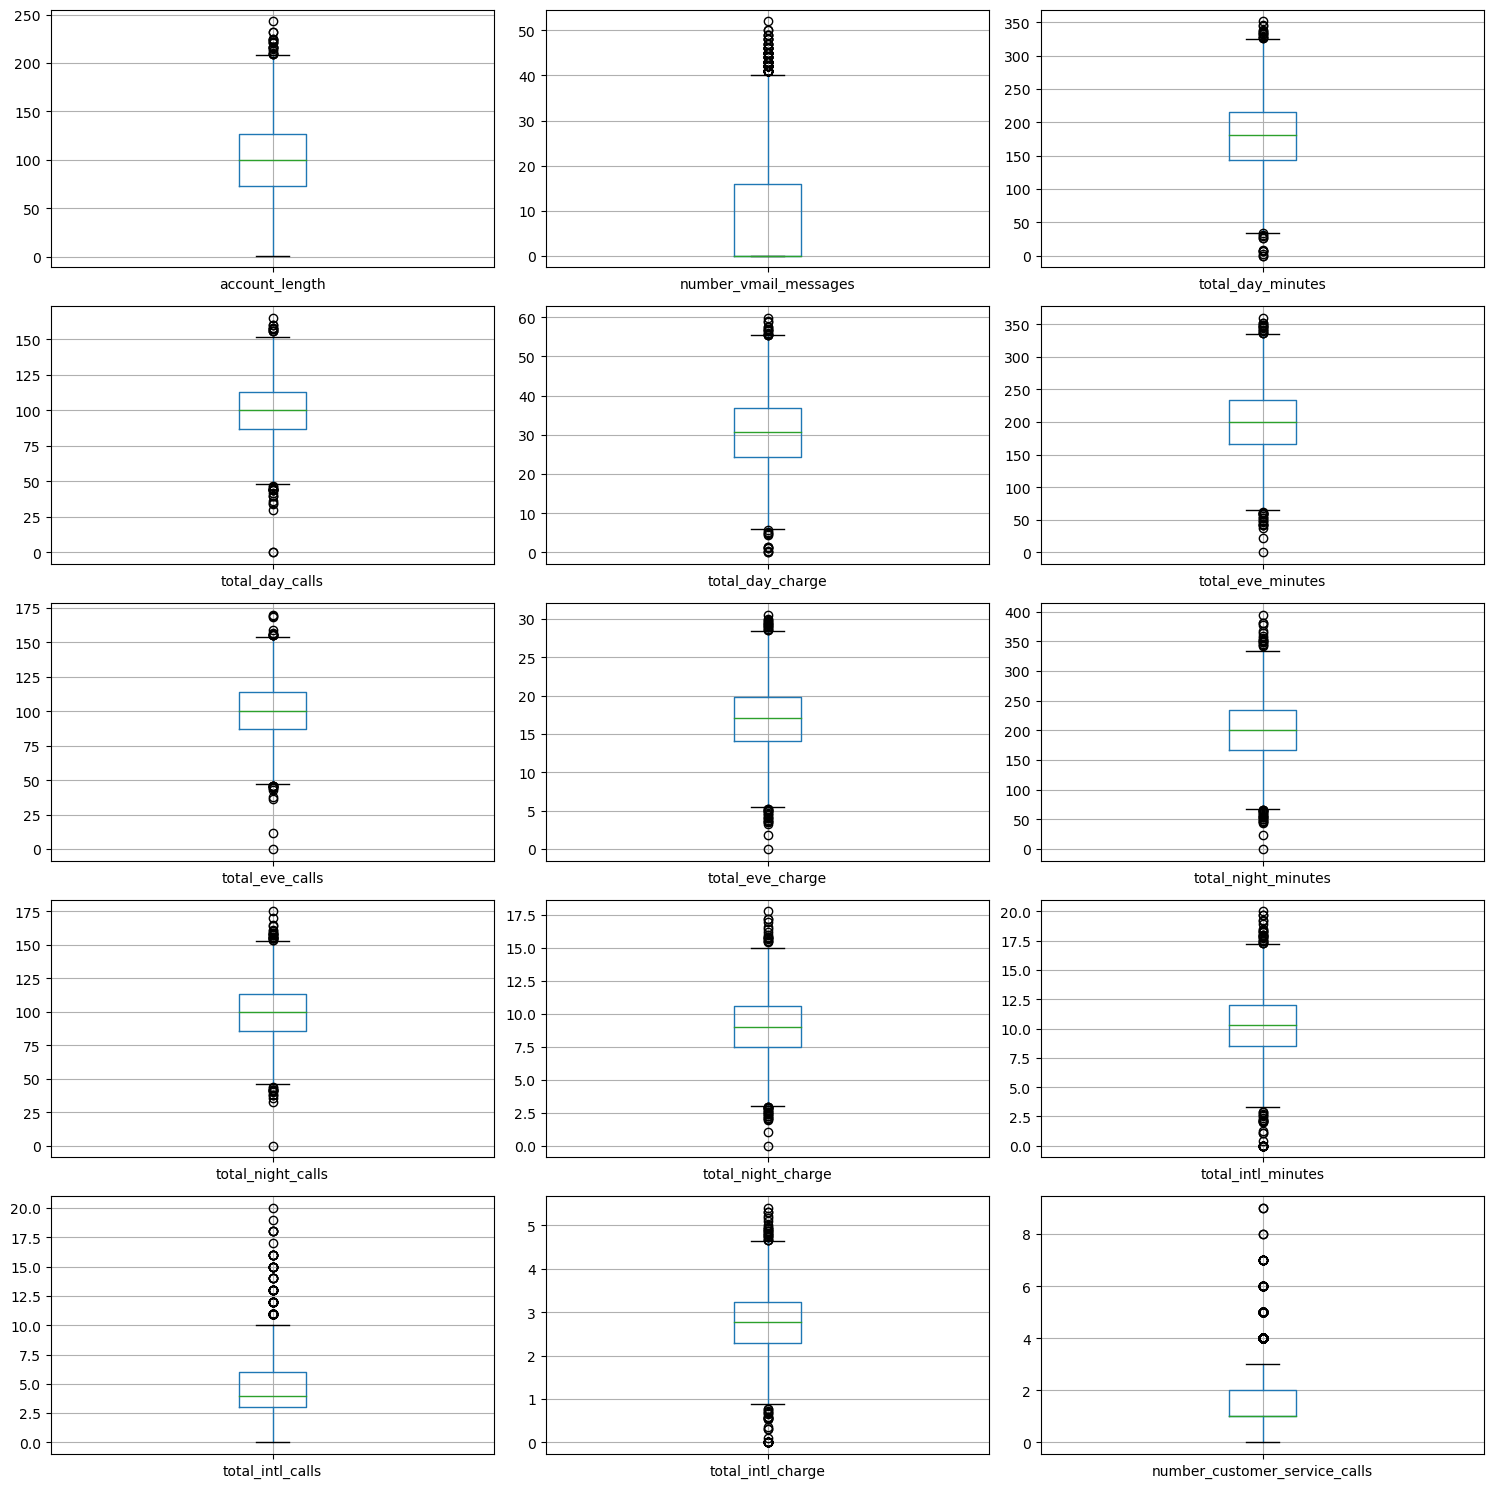

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

for i, col in enumerate(numeric_col):
    row = i // 3
    col = numeric_col[i]
    df_train.boxplot(column=col, ax=axes[row, i%3])
    #axes[row, i%3].set_title(f'Boxplot of {numeric_col[i]}') #untuk menggunakan title pada setiap subplot

plt.tight_layout()
plt.show()

terlihat bahwa setiap kolom numerik pada data customer churn ini memiliki outlier, tetapi outlier ini masih tergolong valid karena merupakan data alami bukan kesalahan input (human error) sehingga tidak perlu ditangani pada tahap pre-processing

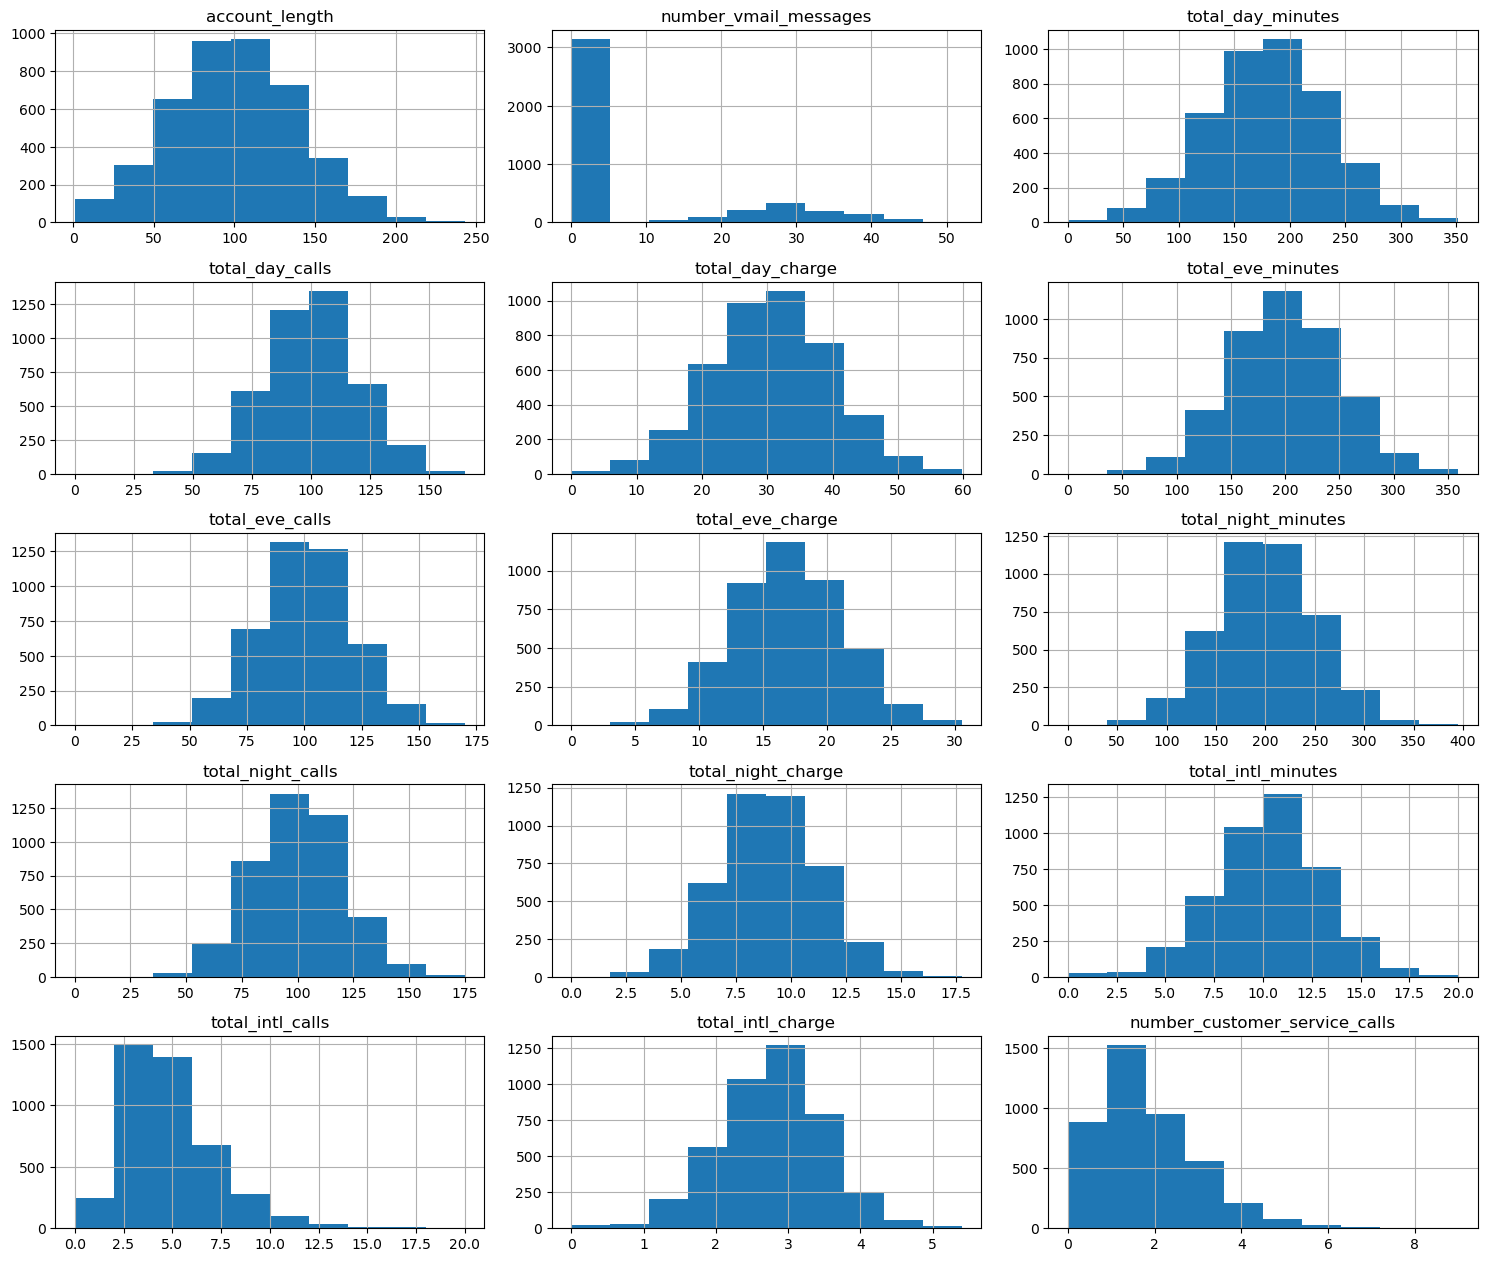

In [6]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15))

for i, col in enumerate(numeric_col):
    row = i // 3
    col = numeric_col[i]
    df_train.hist(column=col, ax=axes[row, i%3])
    #axes[row, i%3].set_title(f'Boxplot of {numeric_col[i]}') #untuk menggunakan title pada setiap subplot
    
for i in range(len(numeric_col), 6*3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])
    
plt.tight_layout()
plt.show()

Dapat dilihat bahwa data memiliki distribusi yang cenderung normal kecuali beberapa fitur seperti total_intl_calls dan number_customer_service_calls yang memiliki distribusi data condong ke kanan (positive skewness) dan number_vmail_messages yang berbentuk acak/random karena tidak memiliki bentuk yang jelas yang mengindikasikan bahwa data tidak terdistribusi secara merata 

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]),
 [Text(0.5, 0, 'account_length'),
  Text(1.5, 0, 'number_vmail_messages'),
  Text(2.5, 0, 'total_day_minutes'),
  Text(3.5, 0, 'total_day_calls'),
  Text(4.5, 0, 'total_day_charge'),
  Text(5.5, 0, 'total_eve_minutes'),
  Text(6.5, 0, 'total_eve_calls'),
  Text(7.5, 0, 'total_eve_charge'),
  Text(8.5, 0, 'total_night_minutes'),
  Text(9.5, 0, 'total_night_calls'),
  Text(10.5, 0, 'total_night_charge'),
  Text(11.5, 0, 'total_intl_minutes'),
  Text(12.5, 0, 'total_intl_calls'),
  Text(13.5, 0, 'total_intl_charge'),
  Text(14.5, 0, 'number_customer_service_calls')])

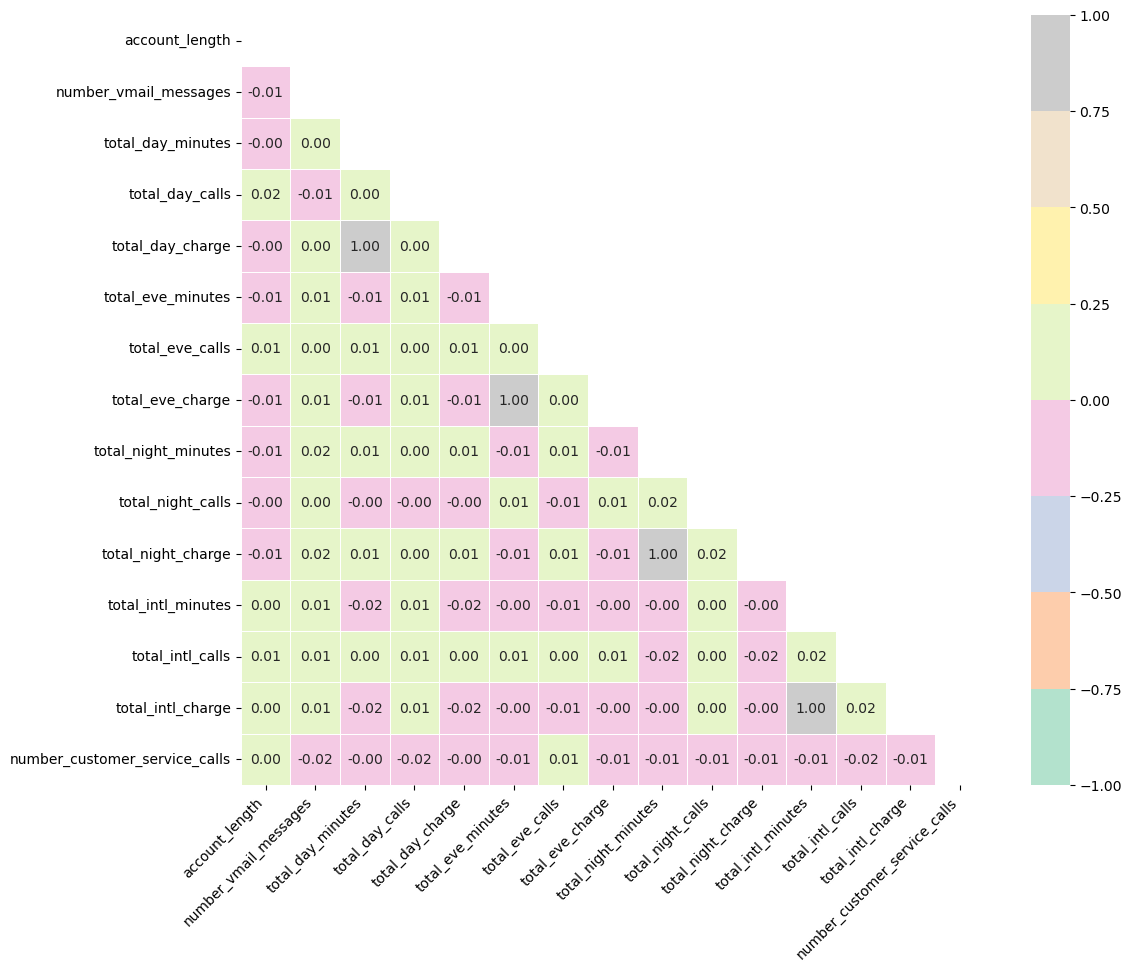

In [29]:
# melihat korelasi dari masing-masing kolom numerik
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(df_train.corr(numeric_only=True)))
corr_matix = df_train.corr(numeric_only=True)
sns.heatmap(corr_matix, vmin=-1, vmax=1, annot=True, cmap='Pastel2', fmt='.2f', linewidth=.5, mask=mask)
plt.xticks(rotation=45, ha='right')

Terdapat beberapa fitur yang saling berkorelasi positif sempurna satu sama lain yaitu total_day_charge dan total_day_minutes, total_eve_charge dan total_eve_minutes, total_night_charge dan total_night_minutes, total_intl_charge dan total_intl_minutes yang mengindikasikan terdapat multikolinearitas pada data sehingga perlu dilakukan feature engineering untuk memilih fitur optimal yang akan digunakan pada tahap modelling.

### Proporsi Customer Churn

In [10]:
# Melihat keseimbangan kelas data
label = df_train['churn'].value_counts()
label = label.to_frame()
label

,count
churn,
no,3652
yes,598


In [17]:
label.index

Index(['no', 'yes'], dtype='object', name='churn')

Text(0.5, 1.0, 'Jumlah Data Masing-masing Kelas')

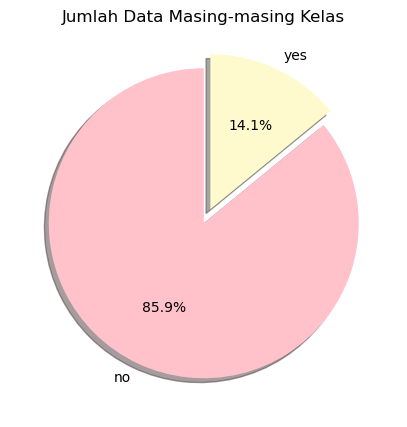

In [11]:
fig, ax = plt.subplots(figsize=(5,8))
ax.pie(label['count'], 
      labels = label.index,
      explode = (0, 0.1),
      autopct='%1.1f%%',
      colors = ['#ffc1ca', '#fffacd'], 
      startangle=90,
      shadow = True)

ax.set_title('Jumlah Data Masing-masing Kelas')

Sebesar 14% customer memilih untuk berhenti menggunakan layanan, namun angka ini masih lebih kecil dibandingkan customer yang masih berlangganan layanan.
Jika dilihat dari proporsi kategori atau kelas variabel churn ketidakseimbangan jumlah data antar kelas no dan yes cukup besar. Hal ini mengakibatkan model akan melakukan tugasnya dalam memprediksi data pada kelas mayoritas (no) lebih baik dibandingkan kelas minoritas (yes).

### CHI SQUARE TEST BETWEEN CATEGORICAL VARIABLE

In [44]:
# test chi-square antara variabel area_code dan churn
areacode_ct = pd.crosstab(df_train['churn'], df_train['area_code'])
print('Berikut merupakan tabel kontingensi \n', areacode_ct)

# calculate chi-quare
chival, p, dof, expected = stats.chi2_contingency(areacode_ct)
 
# interpret p-value
alpha = 0.05
print("\nNilai P-Value = " + str(p))
if p <= alpha:
    print('Tolak H0')
else:
    print('Gagal Tolak H0')

Berikut merupakan tabel kontingensi 
 area_code  area_code_408  area_code_415  area_code_510
churn                                                 
no                   934           1821            897
yes                  152            287            159

Nilai P-Value = 0.5442605842955197
Gagal Tolak H0


H0 : Tidak terdapat hubungan yang signifikan antara variabel area_code dengan variabel churn  
H1 : Terdapat hubungan yang signifikan antara variabel area_code dengan variabel churn
    
Karena Gagal Tolak H0 berarti bahwa kedua variabel yaitu area_code dan churn tidak terdapat hubungan yang berarti atau signifikan

<Axes: xlabel='churn'>

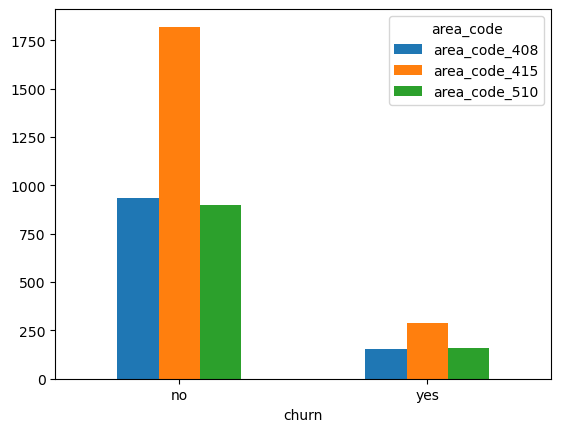

In [59]:
# visualisasi bar chart
areacode_ct.plot(kind='bar', rot=0)

In [9]:
# test chi-square antara variabel international_plan dan churn
interplan_ct = pd.crosstab( df_train['churn'],df_train['international_plan'])
print('Berikut merupakan tabel kontingensi \n', interplan_ct)

##calculate chi square
chival, p, dof, expected = stats.chi2_contingency(interplan_ct)
 
# interpret p-value
alpha = 0.05
print("\nNilai P-Value = " + str(p))
if p <= alpha:
    print('Tolak H0')
else:
    print('Gagal Tolak H0')

Berikut merupakan tabel kontingensi 
 international_plan    no  yes
churn                        
no                  3423  229
yes                  431  167

Nilai P-Value = 1.9831895448817517e-63
Tolak H0


H0 : Tidak terdapat hubungan yang signifikan antara variabel international_plan dengan variabel churn   
H1 : Terdapat hubungan yang signifikan antara variabel international_plan dengan variabel churn
    
Karena Tolak H0 berarti bahwa kedua variabel yaitu international plan dan churn memiliki hubungan yang siginifikan atau berarti

<Axes: xlabel='churn'>

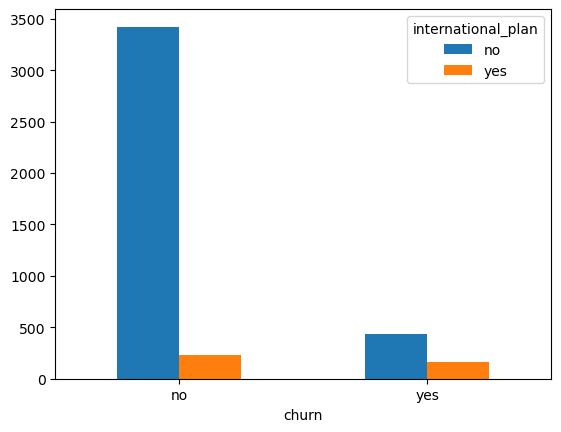

In [10]:
# visualisasi bar chart
interplan_ct.plot(kind='bar', rot=0)

In [7]:
# test chi-square antara variabel voice_mail_plan dan churn
vmail_ct = pd.crosstab(df_train['churn'], df_train['voice_mail_plan'])
print('Berikut merupakan tabel kontingensi \n', vmail_ct)

#calculate chi square
chival, p, dof, expected = stats.chi2_contingency(vmail_ct)
 
# interpret p-value
alpha = 0.05
print("\nNilai P-Value = " + str(p))
if p <= alpha:
    print('Tolak H0')
else:
    print('Gagal Tolak H0')

Berikut merupakan tabel kontingensi 
 voice_mail_plan    no   yes
churn                      
no               2622  1030
yes               516    82

Nilai P-Value = 1.139803854851859e-13
Tolak H0


H0 : Tidak terdapat hubungan yang signifikan  antara variabel voice_mail_plan dengan variabel churn  
H1 : Terdapat hubungan yang signifikan antara variabel voice_mail_plan dengan variabel churn

Karena Tolak H0 berarti bahwa kedua variabel yaitu voice mail plan dan churn memiliki hubungan yang siginifikan atau berarti

<Axes: xlabel='churn'>

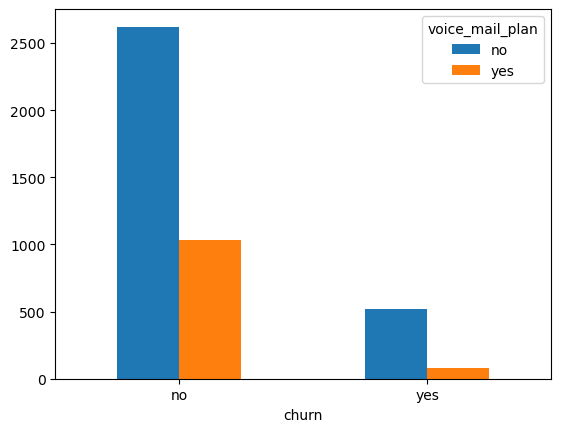

In [8]:
# visualisasi bar chart
vmail_ct.plot(kind='bar', rot=0)

## PRE-PROCESSING

### Convert the categorical column into numeric

In [12]:
# convert data kategorik menjadi numerik untuk dapat di analisis
kategorik = df_train[['international_plan','voice_mail_plan','churn']]

for x in kategorik:
    df_train[x] = np.where(df_train[x]=='yes',0,1)

In [13]:
df_train['area_code'] = df_train['area_code'].replace({'area_code_415':0, 'area_code_408':1, 'area_code_510':2})

In [14]:
# convert data kategorik menjadi numerik untuk dapat di analisis
kategorik = df_test[['international_plan','voice_mail_plan']]

for x in kategorik:
    df_test[x] = np.where(df_test[x]=='yes',0,1)

In [15]:
df_test['area_code'] = df_test['area_code'].replace({'area_code_415':0, 'area_code_408':1, 'area_code_510':2})

### Splitting and drop unnecessary column

In [16]:
# Membagi dataset menjadi variabel input (X)
X_train = df_train.drop(columns=['state','churn'], axis=1)
# assign variabel churn ke variabel target (Y)
y_train = df_train['churn']

In [17]:
# Membagi dataset test menjadi variabel input (X)
X_test = df_test.drop(columns=['id','state'], axis=1)

### Rescaling

In [21]:
# Rescaling data train menggunakan MinMax
minmax = preprocessing.MinMaxScaler()
X_train_norm = minmax.fit_transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, columns=X_train.columns)
X_train_norm

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.438017,0.0,1.0,0.0,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
1,0.561983,0.0,1.0,1.0,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
2,0.342975,0.5,0.0,1.0,0.000000,0.851778,0.430303,0.851740,0.172279,0.517647,0.172233,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
3,0.305785,0.0,0.0,1.0,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
4,0.495868,1.0,1.0,0.0,0.461538,0.620768,0.533333,0.620649,0.969942,0.635294,0.969876,0.538228,0.674286,0.538548,0.375,0.35,0.375926,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,0.338843,0.0,1.0,1.0,0.000000,0.535704,0.424242,0.535643,0.678542,0.517647,0.678454,0.541013,0.451429,0.541362,0.515,0.30,0.514815,0.000000
4246,0.297521,0.5,1.0,1.0,0.000000,0.506117,0.539394,0.506024,0.365154,0.482353,0.365095,0.471392,0.508571,0.471581,0.575,0.30,0.575926,0.333333
4247,0.305785,0.5,1.0,1.0,0.000000,0.485633,0.612121,0.485609,0.537434,0.741176,0.537328,0.326835,0.594286,0.326956,0.345,0.35,0.344444,0.111111
4248,0.202479,0.5,1.0,0.0,0.769231,0.670555,0.769697,0.670515,0.620651,0.741176,0.620825,0.753165,0.662857,0.753517,0.495,0.25,0.494444,0.222222


In [22]:
# Rescaling data test menggunakan MinMax
minmax = preprocessing.MinMaxScaler()
X_test_norm = minmax.fit_transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns)
X_test_norm

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.535865,0.0,1.0,0.0,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667
1,0.493671,1.0,0.0,1.0,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000
2,0.257384,0.0,1.0,1.0,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667
3,0.388186,1.0,1.0,1.0,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000
4,0.729958,0.0,1.0,1.0,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.544304,0.0,1.0,1.0,0.000000,0.315992,0.483871,0.315945,0.586767,0.472441,0.587049,0.484365,0.634615,0.484397,0.597884,0.368421,0.598039,0.000000
746,0.303797,0.5,1.0,1.0,0.000000,0.486846,0.637097,0.486698,0.719699,0.370079,0.719745,0.609126,0.641026,0.609220,0.650794,0.105263,0.650980,0.500000
747,0.637131,0.0,1.0,1.0,0.000000,0.507538,0.411290,0.507390,0.678496,0.283465,0.678698,0.519145,0.647436,0.519149,0.777778,0.105263,0.778431,0.500000
748,0.253165,0.0,1.0,1.0,0.000000,0.378658,0.403226,0.378543,0.425865,0.716535,0.426044,0.515316,0.544872,0.515603,0.719577,0.210526,0.719608,0.166667


### Determining the optimal number of principal components

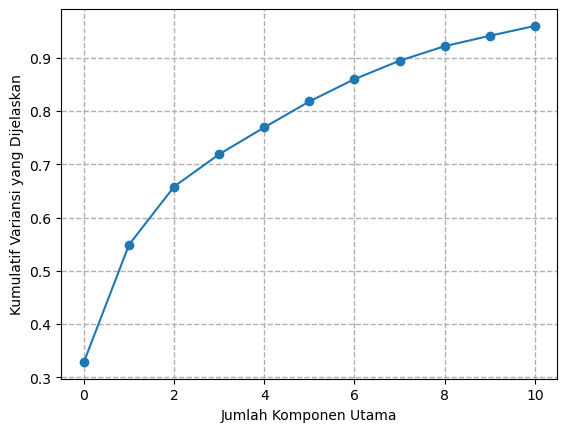

In [32]:
pca = PCA(n_components=0.95)  # Pilih jumlah PC yang menjelaskan minimal 95% variansi
pca.fit(X_train_norm)

plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.grid(linestyle="--", linewidth=1)
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Kumulatif Variansi yang Dijelaskan')
plt.show()

In [51]:
# PC yang dipilih adalah 9
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_norm)
X_test_pca = pca.fit_transform(X_test_norm)
sum(pca.explained_variance_ratio_)

0.9078412419212498

## MODELLING & EVALUATION

### Random Forest

#### without PCA

In [35]:
# Klasifikasi random forest dengan stratified cross-validation
RF = RandomForestClassifier(class_weight='balanced', criterion='entropy',random_state=42)
RF.fit(X_train_norm, y_train)

# menggunakan stratified cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# menggunakan stratified cross-validation
scoring = ['precision', 'recall', 'f1', 'roc_auc']
for score in scoring:
    cv_scores = cross_val_score(RF, X_train_norm, y_train, cv=skf, scoring=score)
    score_mean = cv_scores.mean()
    print(f"Evaluasi nilai {score.capitalize()} \t= {score_mean:.4f}")

Evaluasi nilai Precision 	= 0.9596
Evaluasi nilai Recall 	= 0.9923
Evaluasi nilai F1 	= 0.9756
Evaluasi nilai Roc_auc 	= 0.9176


#### with PCA

In [38]:
pipeline_rf = Pipeline([
    ('pca', pca),
    ('classifier', RF)
])

# Lakukan stratified cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# print score stratified cross-validation
scoring = ['precision', 'recall', 'f1', 'roc_auc']
for score in scoring:
    cv_scores = cross_val_score(pipeline_rf, X_train_pca, y_train, cv=skf, scoring=score)
    score_mean = cv_scores.mean()
    print(f"Evaluasi nilai {score.capitalize()} \t= {score_mean:.4f}")

Evaluasi nilai Precision 	= 0.9391
Evaluasi nilai Recall 	= 0.9874
Evaluasi nilai F1 	= 0.9626
Evaluasi nilai Roc_auc 	= 0.9065


### Logistic Regression

#### without PCA

In [36]:
# Klasifikasi logistic regression dengan stratified cross-validation
LR = LogisticRegression(class_weight='balanced', random_state=42)
LR.fit(X_train_norm, y_train)

# menggunakan stratified cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# menggunakan stratified cross-validation
scoring = ['precision', 'recall', 'f1', 'roc_auc']
for score in scoring:
    cv_scores = cross_val_score(LR, X_train_norm, y_train, cv=skf, scoring=score)
    score_mean = cv_scores.mean()
    print(f"Evaluasi nilai {score.capitalize()} \t= {score_mean:.4f}")

Evaluasi nilai Precision 	= 0.9529
Evaluasi nilai Recall 	= 0.7766
Evaluasi nilai F1 	= 0.8555
Evaluasi nilai Roc_auc 	= 0.8298


#### with PCA

In [52]:
pipeline_lr = Pipeline([
    ('pca', pca),
    ('classifier', LR)
])

# Lakukan stratified cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# print score stratified cross-validation
scoring = ['precision', 'recall', 'f1', 'roc_auc']
for score in scoring:
    cv_scores = cross_val_score(pipeline_lr, X_train_pca, y_train, cv=skf, scoring=score)
    score_mean = cv_scores.mean()
    print(f"Evaluasi nilai {score.capitalize()} \t= {score_mean:.4f}")

Evaluasi nilai Precision 	= 0.9545
Evaluasi nilai Recall 	= 0.7766
Evaluasi nilai F1 	= 0.8562
Evaluasi nilai Roc_auc 	= 0.8294


### Predict Data Test

Random forest tanpa PCA merupakan model yang memiliki nilai evaluasi paling tinggi sehingga model inilah dipilih untuk memprediksi data test.

In [54]:
prediksi_modelRF = RF.predict(X_test_norm)
print(prediksi_modelRF)

[1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 

In [55]:
len(prediksi_modelRF)

750

In [59]:
# Get unique values and their counts
unique_values, counts = np.unique(prediksi_modelRF, return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 130
1: 620
